In [9]:
%matplotlib inline
from pylab import *
from numpy.random import seed 
from sklearn.datasets import make_blobs, make_moons, make_circles
from keras import Input
from keras import Sequential
from keras.layers import Dropout, InputLayer, Dense
from matplotlib.colors import ListedColormap
from pandas import DataFrame

def make_dataframe(**kwargs):
    return DataFrame(kwargs)

def my_plot_2D_data(D,T=None):
    if T is None:
        dataframe=D
    else:
        dataframe = make_dataframe( x=D[:,0], y=D[:,1], target=T )
    for target, data in dataframe.groupby("target"):
        plot(data.x, data.y, 'o', label=f"target={target}")

def my_make_blobs(n=2,a=3, xscale=1, yscale=1, xshift=0,nb_classes=2,n_samples=100, random_state=0):
    centers = [[0,0],[a,a],[a*2,0],[a,-a],
               [a,2*a]]
    D,T = make_blobs(
        n_samples=n_samples,
        centers=centers[0:n],
        cluster_std=1,
        n_features=2, 
        random_state=random_state
    )
    T = T%nb_classes
    return make_dataframe( x=D[:,0]*xscale+xshift, y=D[:,1]*yscale, target=T )

def my_circles():
    D,T = make_circles(
        n_samples=50,
        shuffle=True,
        noise=0.1,
        random_state=0, 
        factor=0.5
    )
    D2,T2 = make_circles(
        n_samples=100,
        shuffle=True,
        noise=0.05,
        random_state=0, 
        factor=0.5
    )
    D = concatenate((D,4*D2[T2==1,:]), axis=0)
    T = concatenate((T,T2[T2==1]), axis=0)
    return make_dataframe( x=D[:,0], y=D[:,1], target=T )

def my_make_moons():
    D,T = make_moons(
        n_samples=300, 
        shuffle=True,
        noise=0.2, 
        random_state=0
    )
    T = T%2
    return make_dataframe( x=D[:,0], y=D[:,1], target=T )

def make_challenge(level):
    if level==0: return my_make_blobs(2)
    elif level==1: return my_make_blobs(3)
    elif level==2: return my_make_blobs(4)
    elif level==3: return my_circles()
    elif level==4: return my_make_moons()
    raise Exception(f"unknown level f{level}")

def draw_hnf(p,x,y,c='b-',**kwargs):
    # x*p[0]+y*p[1]+p[2]=0
    if abs(p[1])>abs(p[0]):
        # y = x*p[0]/p[1]+p[2]/p[1]
        px = array([min(x),max(x)])
        py = -px*p[0]/p[1]-p[2]/p[1]
    else:    
        # x = y*p[1]/p[0]+p[2]/p[0]
        py = array([min(y),max(y)])
        px = -py*p[1]/p[0]-p[2]/p[0]
    plot(px,py,c,linewidth=2,**kwargs);

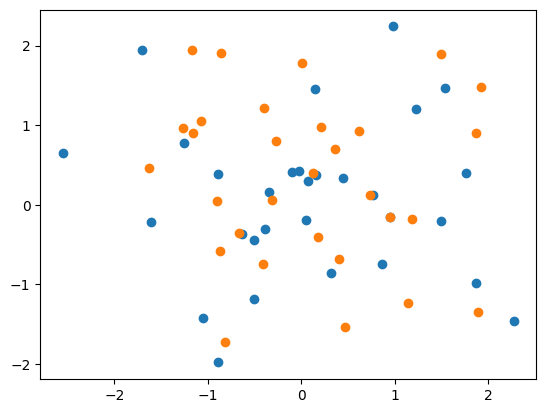

In [12]:
dataframe = my_make_blobs(n=2,a=0, n_samples=60)
my_plot_2D_data(dataframe)

In [13]:
train = np.array(dataframe[['x', 'y']])
target = np.array(dataframe['target'])

In [15]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(300, activation='tanh', use_bias=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = "mse")
history = model.fit(train, target, batch_size=40, epochs=50000, shuffle=False, verbose=0)

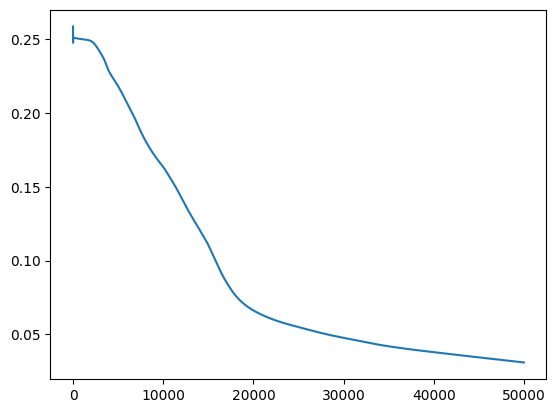

In [16]:
plot(history.history['loss'], label='loss');

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


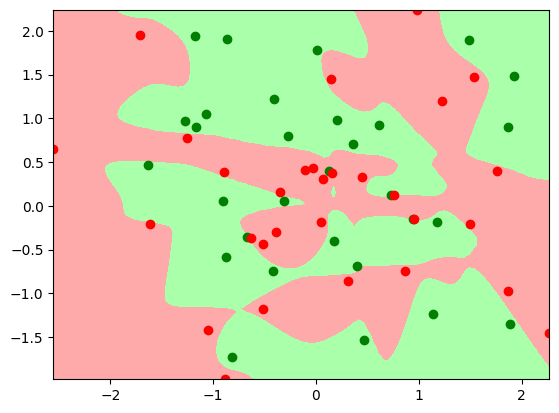

In [17]:
x = dataframe.x
y = dataframe.y
N=100
X,Y = meshgrid( linspace(min(x),max(x),N), linspace(min(y),max(y),N) )
D = stack((X.flatten(), Y.flatten())).transpose()
T = model.predict(D)
T=T.flatten().reshape(X.shape)
cmap = ListedColormap(['#FFAAAA', '#AAFFAA'])

# Define contour levels
levels = np.linspace(0, 1, 3)  # Adjust levels as needed

# Plot the contours
contourf(X, Y, T, levels=levels, cmap=cmap, extend=True)
plot( x[target==+1], y[target==+1], 'go' )
plot( x[target==0], y[target==0], 'ro' );

In [18]:
from numpy.random import seed
seed(0)
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras import regularizers

In [19]:
dataframe = my_make_blobs(2, n_samples=50, random_state=0)
dataframe_val = my_make_blobs(2, n_samples=50, random_state=100) # optional: Validierungsdaten
dataframe.x.at[1]=4
dataframe.y.at[1]=2
dataframe.target.at[1]=0
dataframe.x.at[0]=3
dataframe.y.at[0]=2
dataframe.target.at[0]=0

In [20]:
def plot_result():
    figure(figsize=[14,7])
    subplot(1,2,1)
    N=100
    X,Y = meshgrid( linspace(min(x),max(x),N), linspace(min(y),max(y),N) )
    D = stack((X.flatten(), Y.flatten())).transpose()
    T = model.predict(D)
    T=T.flatten().reshape(X.shape)
    contourf(X,Y,sign(T),colors=['#FFAAAA','#AAFFAA'], extend=True)
    plot( x[label==+1], y[label==+1], 'go' )
    plot( x[label==-1], y[label==-1], 'ro' )
    plot( x_val[label_val==+1], y_val[label_val==+1], 'g+' )
    plot( x_val[label_val==-1], y_val[label_val==-1], 'r+' )
    
    subplot(1,2,2)
    print(history.history.keys());
    plot(history.history['loss'], label='loss');
    plot(history.history['val_loss'], label='validationloss'); legend();
    ylim([0,2]);

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
dict_keys(['loss', 'val_loss'])


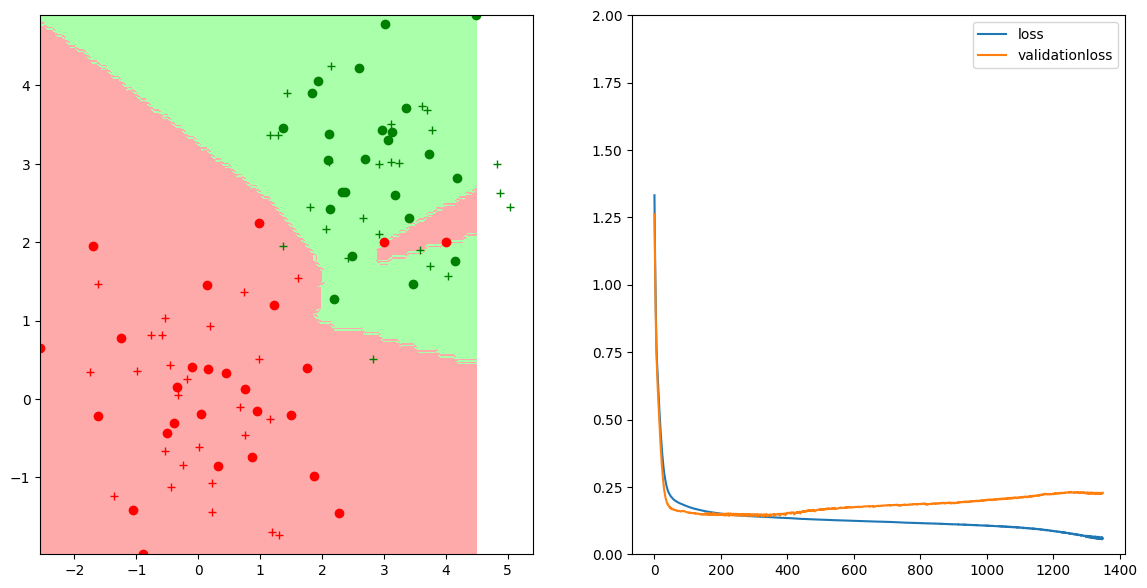

In [21]:
# NN Erstellen
model = Sequential()
model.add(InputLayer(shape=(2, )))
model.add(Dense(30, activation='relu', use_bias=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(Dense(5, activation='relu', use_bias=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(Dense(1, activation="tanh", use_bias=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.compile(optimizer='rmsprop', loss = "mse")

# Training und Ausgabe
x = dataframe.x
y = dataframe.y
label = dataframe.target*2-1

x_val = dataframe_val.x
y_val = dataframe_val.y
label_val = dataframe_val.target*2-1

x_train = dataframe[["x","y"]].values
y_train = dataframe[["target"]].values*2-1
x_train_val = dataframe_val[["x","y"]].values
y_train_val = dataframe_val[["target"]].values*2-1
history = model.fit(x_train, y_train, validation_data=(x_train_val, y_train_val), batch_size=10, epochs=1350, shuffle=False, verbose=0)

# Diagram
plot_result()

### Early Stopping

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
dict_keys(['loss', 'val_loss'])


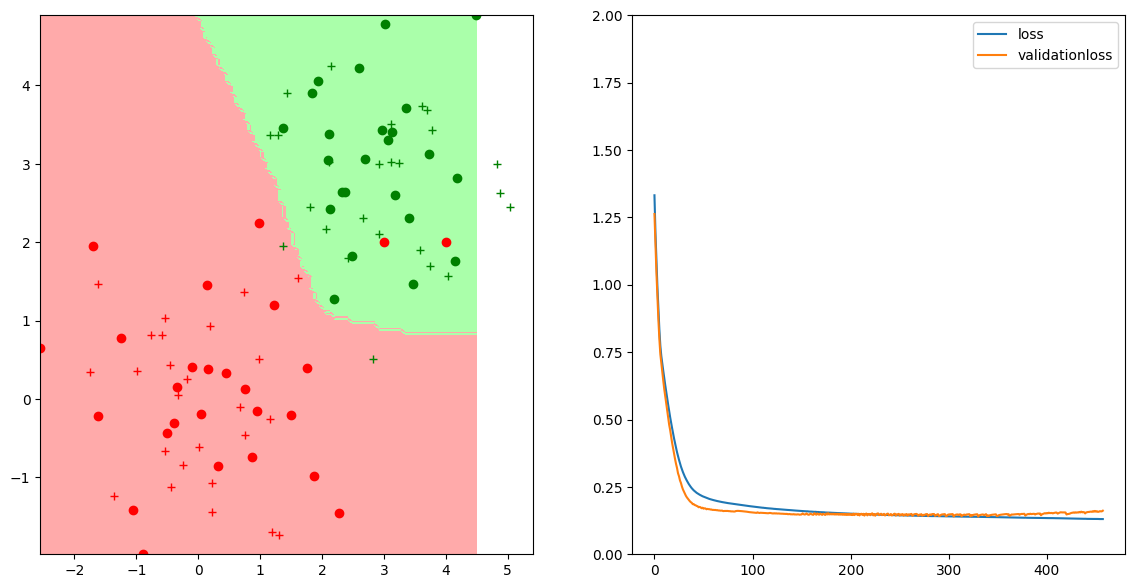

In [22]:
# Erstelle NN
callback = EarlyStopping(monitor='loss', patience=3)
model = Sequential()
model.add(InputLayer(shape=(2, )))
model.add(Dense(30, activation='relu', use_bias=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(Dense(5, activation='relu', use_bias=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(Dense(1, activation="tanh", use_bias=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.compile(optimizer='rmsprop', loss = "mse")

# Training und Ausgabe
x = dataframe.x
y = dataframe.y
label = dataframe.target*2-1

x_val = dataframe_val.x
y_val = dataframe_val.y
label_val = dataframe_val.target*2-1

x_train = dataframe[["x","y"]].values
y_train = dataframe[["target"]].values*2-1
x_train_val = dataframe_val[["x","y"]].values
y_train_val = dataframe_val[["target"]].values*2-1
history = model.fit(
    x_train, y_train, 
    validation_data=(x_train_val, y_train_val), 
    batch_size=10, epochs=1350, 
    shuffle=False, verbose=0, 
    callbacks=[callback]
)

# Diagramm
plot_result()

## Dropout Layer

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
dict_keys(['loss', 'val_loss'])


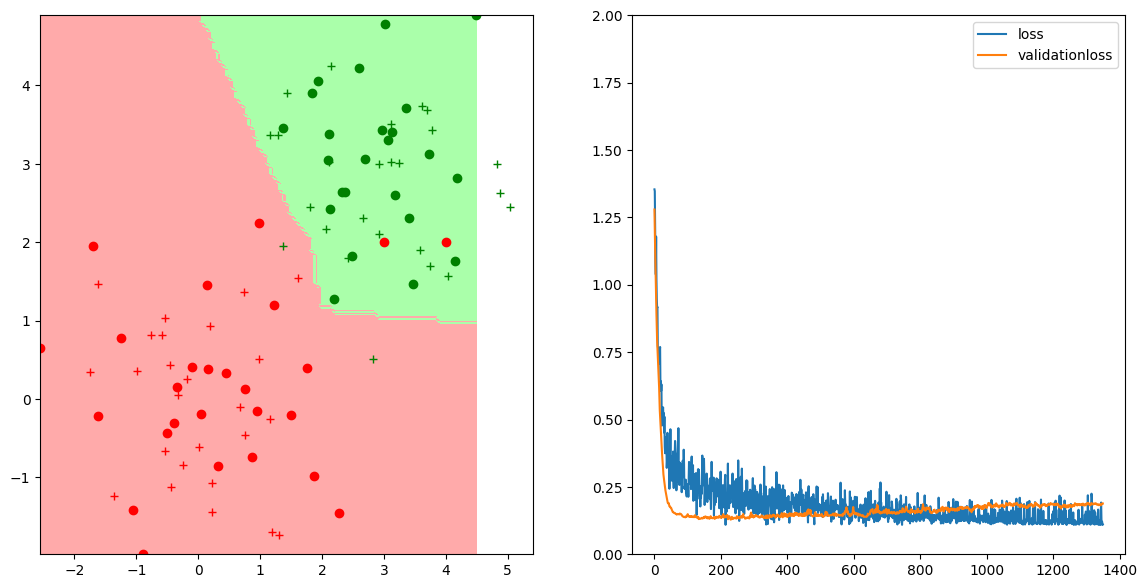

In [23]:
# Erstelle NN
model = Sequential()
model.add(InputLayer(shape=(2, )))
model.add(Dense(30, activation='relu', use_bias=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(Dropout(rate=0.2))
model.add(Dense(5, activation='relu', use_bias=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation="tanh", use_bias=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.compile(optimizer='rmsprop', loss = "mse")

# Training und Ausgabe
x = dataframe.x
y = dataframe.y
label = dataframe.target*2-1

x_val = dataframe_val.x
y_val = dataframe_val.y
label_val = dataframe_val.target*2-1

x_train = dataframe[["x","y"]].values
y_train = dataframe[["target"]].values*2-1
x_train_val = dataframe_val[["x","y"]].values
y_train_val = dataframe_val[["target"]].values*2-1
history = model.fit(x_train, y_train, validation_data=(x_train_val, y_train_val), batch_size=10, epochs=1350, shuffle=False, verbose=0)

plot_result()

### L1L2-Regularization

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
dict_keys(['loss', 'val_loss'])


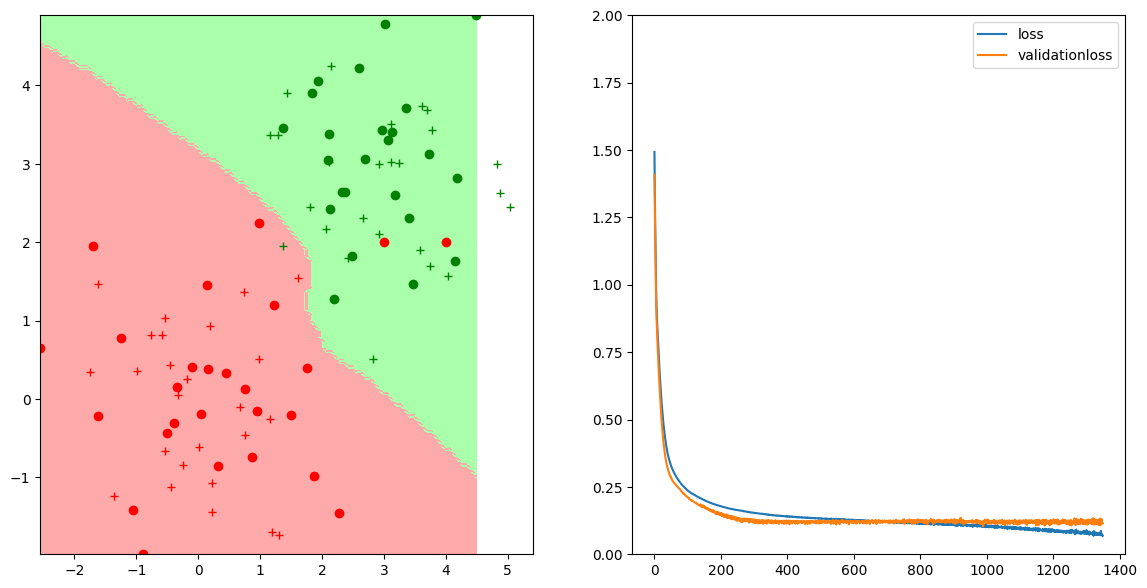

In [24]:
# Erstelle NN
model = Sequential()
model.add(InputLayer(shape=(2, )))
model.add(Dense(30, activation='relu', 
                kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),
                bias_regularizer=regularizers.L2(1e-2),
                activity_regularizer=regularizers.L2(1e-3), 
                use_bias=True, 
                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(Dense(5, activation='relu', use_bias=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(Dense(1, activation="tanh", use_bias=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.compile(optimizer='rmsprop', loss = "mse") #, metrics = ["accuracy"])

# Training und Ausgabe
x = dataframe.x
y = dataframe.y
label = dataframe.target*2-1

x_val = dataframe_val.x
y_val = dataframe_val.y
label_val = dataframe_val.target*2-1

x_train = dataframe[["x","y"]].values
y_train = dataframe[["target"]].values*2-1
x_train_val = dataframe_val[["x","y"]].values
y_train_val = dataframe_val[["target"]].values*2-1
history = model.fit(x_train, y_train, validation_data=(x_train_val, y_train_val), batch_size=10, epochs=1350, shuffle=False, verbose=0)

# Diagramm
plot_result()